# Поиск картинок Яндекс

Миллионы людей ежедневно пользуются поиском по картинкам в Яндексе. 
Команда Яндекса прикладывает много усилий чтобы сделать сервис более полезным и удобным. 
Но для этого нужно хорошо понимать, какие задачи решают пользователи. К примеру, есть гипотеза, что интересы людей, ищущих картинки на мобильных устройствах и на десктопных компьютерах, заметно отличаются.
Вам нужно проверить эту гипотезу, сравнив запросы на разных платформах.

**Ответим на следующие вопросы**

1. Выведим топ-10 самых частотных запросов в каждой платформе (desktop, touch).
2. Посмотрим, чем отличается трафик запросов в течение дня.
3. Выделим тематики запросов, контрастные для мобильных и компьютеров.

In [20]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from matplotlib.dates import DateFormatter

In [21]:
# Откроем исходный файл
df = pd.read_json(r'C:\Users\Admin\Desktop\data.json')

In [3]:
df.head()

,query,ts,platform
0,порно фото,1631786697,touch
1,малевич картины,1631806465,desktop
2,Секс,1631781583,touch
3,с днём рождения лена,1631771563,touch
4,зверополис порно,1631787599,touch


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203824 entries, 0 to 1203823
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   query     1203824 non-null  object
 1   ts        1203824 non-null  int64 
 2   platform  1203824 non-null  object
dtypes: int64(1), object(2)
memory usage: 27.6+ MB


In [23]:
# Создадим столбцы даты и время
df['date'] = pd.to_datetime(df['ts'], unit='s').dt.date  # Дата 
df['time'] = pd.to_datetime(df['ts'], unit='s').dt.time  # Время

In [24]:
df.head()

,query,ts,platform,date,time
0,порно фото,1631786697,touch,2021-09-16,10:04:57
1,малевич картины,1631806465,desktop,2021-09-16,15:34:25
2,Секс,1631781583,touch,2021-09-16,08:39:43
3,с днём рождения лена,1631771563,touch,2021-09-16,05:52:43
4,зверополис порно,1631787599,touch,2021-09-16,10:19:59


In [25]:
# Период исследования
min_date = df['date'].min()
max_date = df['date'].max()

print(f"Минимальная дата в данных: {min_date}")
print(f"Максимальная дата в данных: {max_date}")

Минимальная дата в данных: 2021-08-31
Максимальная дата в данных: 2021-09-21


In [38]:
# уникальные значения в столбце query
unique_queries = sorted(df['query'].unique(), reverse=True)

for query in unique_queries:
    print(query)

🍑
보지
视频
幼女
سكس
ёжики
ёжик в тумане
ёжик
яэ мико геншин
яэ мико
ящерица
яшма
ячмень на глазу лечение
ячмень на глазу
ячмень
яхта
яхико
ято
ястреб
ясная поляна
ясень дерево
ясень
ярыгин станислав сергеевич
ярославль
ярослав мудрый
яркий фон
яркий маникюр
япончик и патриарх кирилл
япончик и патриарх
япончик
японцы
японское порно
японский шпиц
японский хин
японский секс
японский маникюр
японский алфавит
японские иероглифы
японские девушки фото
японская диета
японки
японка
япония на карте мира
япония на карте
япония
яой хентай
яой секс
яой порно
яой манга
яой 18+
яой
янтарь
янка дягилева
яндекс фото
яндекс учебник
яндекс такси
яндекс станция
яндекс почта
яндекс поиск по фото
яндекс поиск по картинке
яндекс погода
яндекс плюс
яндекс переводчик с английского на русский
яндекс переводчик
яндекс музыка
яндекс маркет
яндекс карты
яндекс картинки загрузить
яндекс картинки
яндекс карта
яндекс игры
яндекс диск
яндекс директ
яндекс дзен
яндекс
яна рудковская
яна кошкина слив
яна кошкина до пластики


In [27]:
df.isnull().sum() #пропуски

query       0
ts          0
platform    0
date        0
time        0
dtype: int64

In [28]:
df.duplicated().sum() #полные дубликаты

np.int64(512)

In [29]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

2. EDA (исследовательский анализ данных)

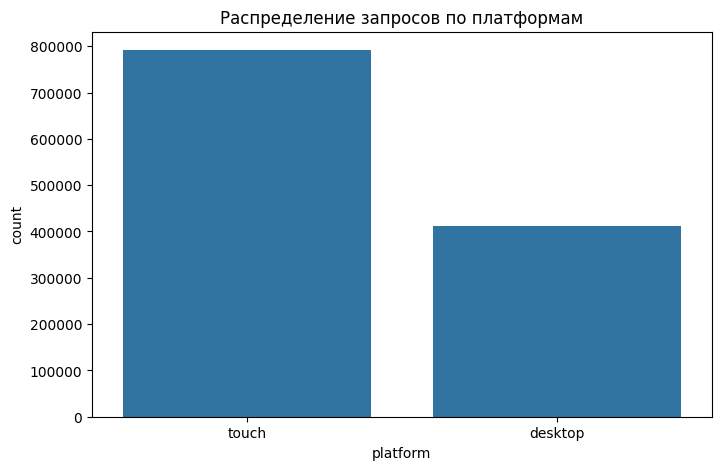

In [30]:
platform_counts = df.groupby('platform').size()

#Визуализация
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='platform')
plt.title("Распределение запросов по платформам")
plt.show()


Топ-10 запросов на смартфонах (touch):
query
порно                      7721
секс                       6324
с днём рождения женщине    4885
с днём рождения            3961
с днём рождения мужчине    3616
хентай                     3153
с днем рождения            3004
xxx                        2428
Порно                      2325
календарь 2021             2234
Name: count, dtype: int64

Топ-10 запросов на компьютерах (desktop):
query
календарь 2021                     2796
таблица менделеева                 2628
картинки                           1647
порно                              1338
английский алфавит                 1293
обои на рабочий стол               1141
Одноклассники (социальная сеть)    1114
секс                                894
таблица квадратов                   877
алфавит                             874
Name: count, dtype: int64


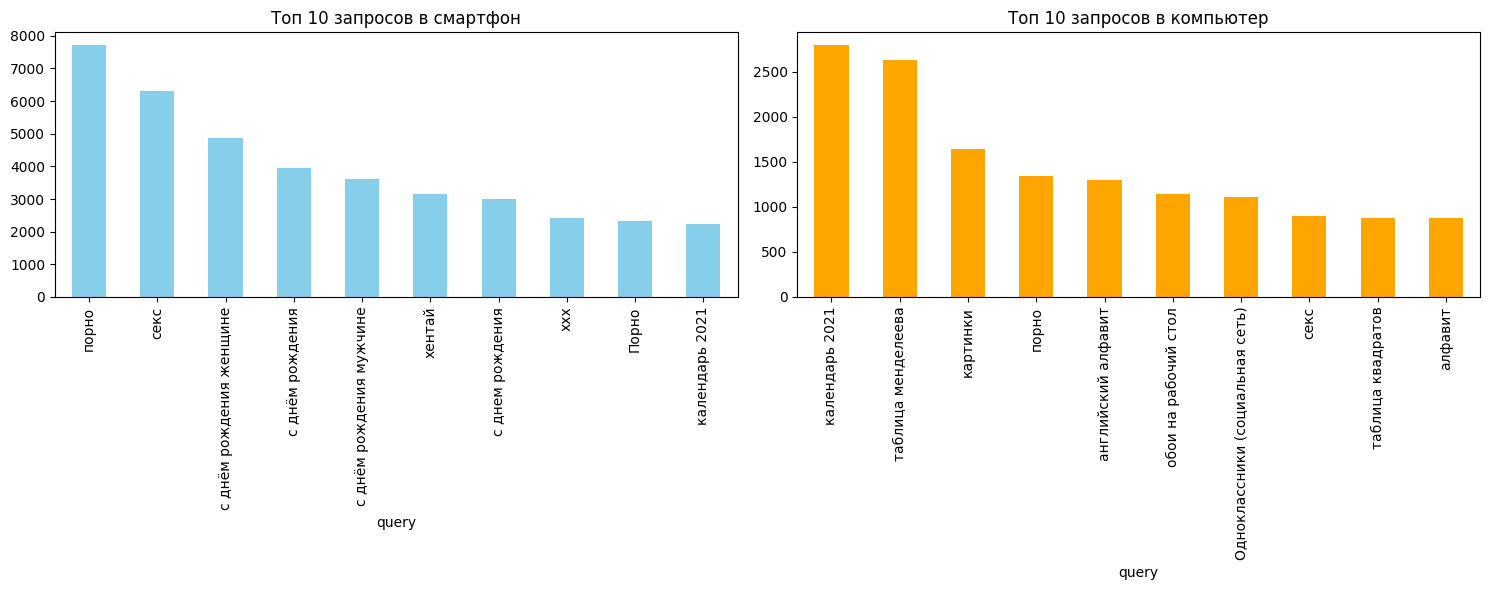

In [31]:
#Посчитаем Топ-10 запросов по платформам
top_touch = df[df['platform'] == 'touch']['query'].value_counts().head(10)
top_desktop = df[df['platform'] == 'desktop']['query'].value_counts().head(10)

print("\nТоп-10 запросов на смартфонах (touch):")
print(top_touch)

print("\nТоп-10 запросов на компьютерах (desktop):")
print(top_desktop)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) #Окно с графиками
top_touch.plot(kind='bar', ax=axes[0], title='Топ 10 запросов в смартфон', color='skyblue') #1 подграфик
top_desktop.plot(kind='bar', ax=axes[1], title='Топ 10 запросов в компьютер', color='orange') #2 подграфик
plt.tight_layout()
plt.show()

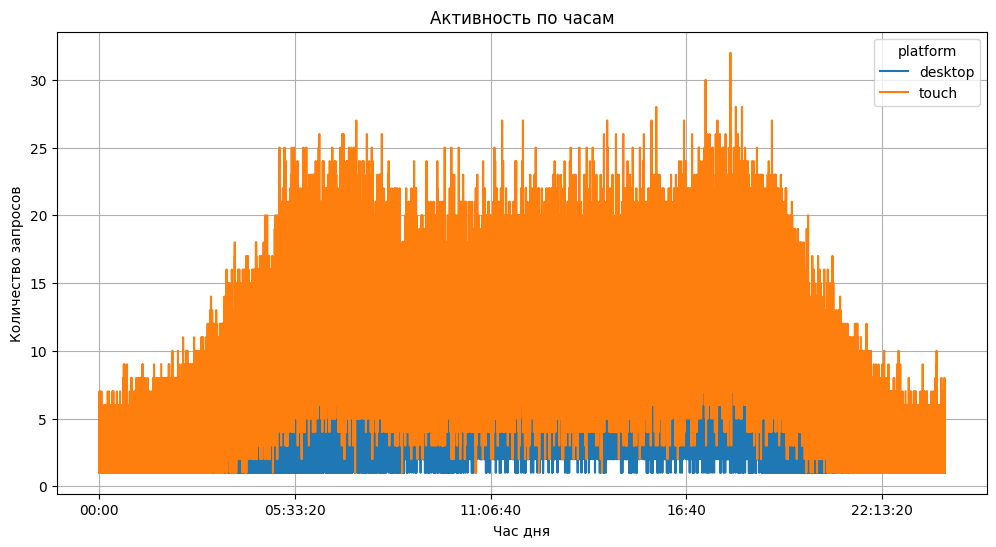

In [32]:
#Группируем данные по двум столбцам, посчитаем их и запишем результат в таблицу, где ‘time’ становится индексами строк, а ‘platform’ - столбцами
hourly_traffic = df.groupby(['time', 'platform']).size().unstack()

#Визуалаизация
hourly_traffic.plot(figsize=(12, 6), title='Активность по часам')
plt.xlabel('Час дня')
plt.ylabel('Количество запросов')
plt.grid(True)
plt.show()

Более высокая активность через смартфон, так как он всегда "под рукой". Ночью активность спадает. Пики по утрам и вечерам. 

Персональным компьютером пользуются в основном утром и вечером, а также днем (возможно через рабочий АРМ). 

Не у всех есть персональный компьютер, он в основном стационарный. 

In [33]:
#Создаем список ключевых слов, которые относятся к ПОРНО контенту
#Эти слова будем искать в поисковых запросах
porno_words = ['порно', 'секс', 'хентай', 'xxx', 'Порно']

#Добавляем в таблицу новый столбец 'porno', который будет содержать True, 
#если запрос содержит хотя бы одно из ПОРНО слов, и False - если не содержит
#str.lower() - приводим текст к нижнему регистру для единообразия
#str.contains() - проверяем наличие любого из слов через '|'.join(porno_words)
df['porno'] = df['query'].str.lower().str.contains('|'.join(porno_words))

#Создаем таблицу сопряженности (перекрестную таблицу), которая показывает:
#- Строки (index): платформы (touch/desktop)
#- Столбцы (columns): является ли запрос "взрослым" (True/False)
#Эта таблица покажет количество запросов каждого типа для каждой платформы
count_table = pd.crosstab(
    index=df['platform'],  #Группируем данные по платформам
    columns=df['porno']  #Разделяем на взрослые/не взрослые запросы
)

#Переименовываем столбцы для большей понятности:
#True -> 'взрослые', False -> 'обычные'
count_table.columns = ['обычные', 'порно']

#Выводим получившуюся таблицу для наглядности
print("Распределение запросов:")
print(count_table)

#Проводим хи-квадрат тест для проверки статистической значимости различий
# [:2] - берем только первые два значения из возвращаемого результата (хи-квадрат и p-value)
chi2, p_value = chi2_contingency(count_table)[:2]

#Выводим результаты статистического теста
#.1f и .3f - форматирование чисел (1 и 3 знака после запятой соответственно)
print(f"\nСтатистика: хи-квадрат = {chi2:.1f}, p-value = {p_value:.3f}")

Распределение запросов:
          обычные  порно
platform                
desktop    403869   7613
touch      736459  55371

Статистика: хи-квадрат = 14435.9, p-value = 0.000


Краткий вывод:

Различия в количестве NSFW-запросов между платформами статистически значимы (p < 0.05).

Что это значит:

Пользователи на смартфонах ищут "взрослый" контент значительно чаще, чем на компьютерах.

Вероятность, что такая разница возникла случайно, менее 0.1% (p-value ≈ 0.000).

Рекомендация:
Учитывать эту разницу при персонализации поиска и фильтрации контента под платформу.

*P.S. Значение хи-квадрат (14435.9) показывает, насколько сильно различаются распределения.*

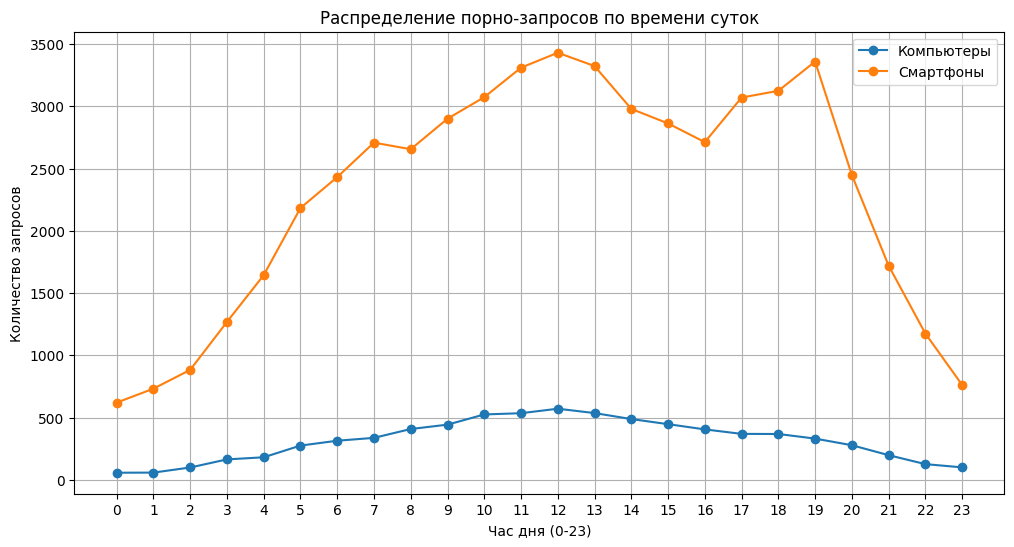

In [34]:
#Добавляем столбец с часом
df['hour'] = pd.to_datetime(df['ts'], unit='s').dt.hour
#Фильтруем порно-запросы и группируем по платформе и часу
porno_by_hour = df[df['porno']].groupby(['platform', 'hour']).size().unstack(level=0)

#Заполняем возможные пропуски нулями
porno_by_hour = porno_by_hour.fillna(0)

#Визуализация
plt.figure(figsize=(12, 6))
plt.plot(porno_by_hour.index, porno_by_hour['desktop'], label='Компьютеры', marker='o')
plt.plot(porno_by_hour.index, porno_by_hour['touch'], label='Смартфоны', marker='o')

#Настройки графика
plt.title('Распределение порно-запросов по времени суток')
plt.xlabel('Час дня (0-23)')
plt.ylabel('Количество запросов')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.show()

Наибольшая активность приходится на середину дня как у смартфонов, так и у компьютеров. 

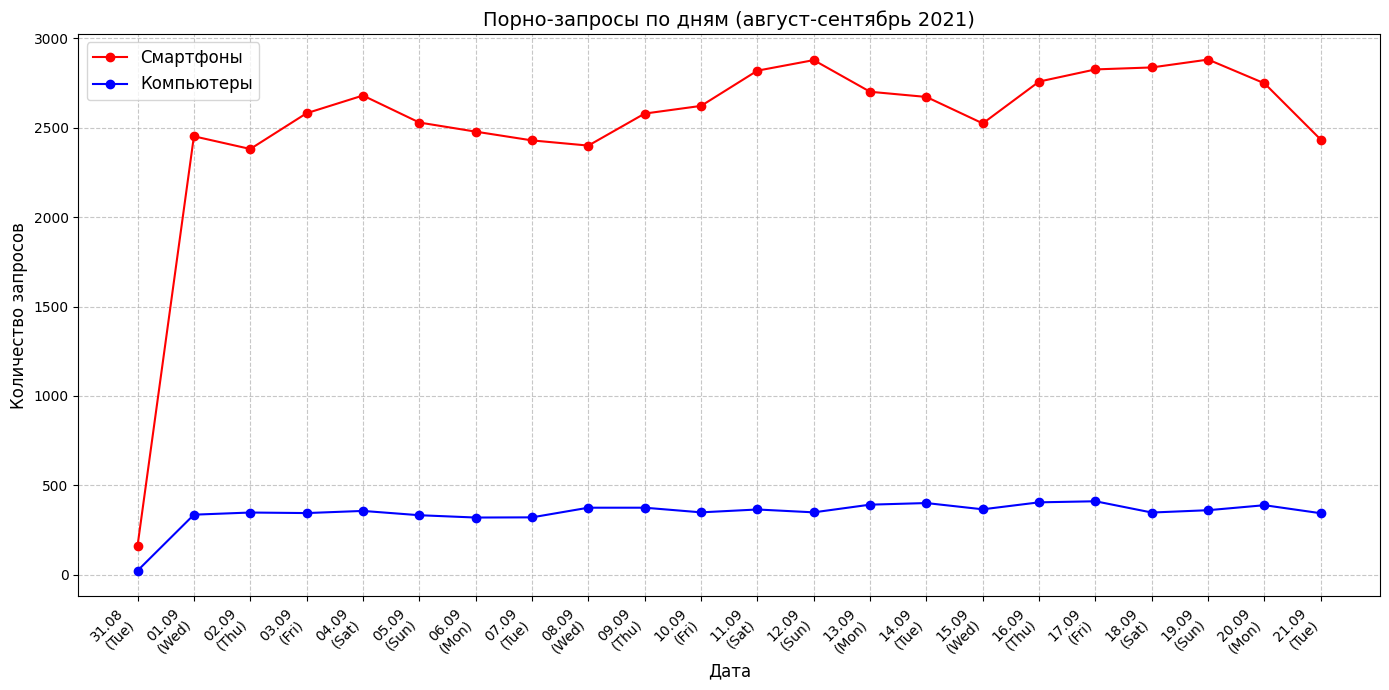

Распределение порно-запросов по дням:


,date,day_of_week,day_month,touch,desktop
0,2021-08-31,Tuesday,31.08,163,23
1,2021-09-01,Wednesday,01.09,2452,336
2,2021-09-02,Thursday,02.09,2381,348
3,2021-09-03,Friday,03.09,2581,345
4,2021-09-04,Saturday,04.09,2680,357
5,2021-09-05,Sunday,05.09,2529,333
6,2021-09-06,Monday,06.09,2478,320
7,2021-09-07,Tuesday,07.09,2429,321
8,2021-09-08,Wednesday,08.09,2400,375
9,2021-09-09,Thursday,09.09,2579,375


In [36]:
#Создаем столбцы с датой и днем недели
df['datetime'] = pd.to_datetime(df['ts'], unit='s')
df['date'] = df['datetime'].dt.date
df['day_of_week'] = df['datetime'].dt.day_name()  # Название дня недели
df['day_month'] = df['datetime'].dt.strftime('%d.%m')  # Дата в формате "день.месяц"

#Фильтруем только порно-запросы
porno_df = df[df['porno']]

#Группируем данные по дате и платформе
daily_porno = porno_df.groupby(['date', 'platform']).size().unstack().fillna(0)

#Добавляем информацию о днях недели для подписей
daily_porno = daily_porno.join(
    df.drop_duplicates('date').set_index('date')[['day_of_week', 'day_month']]
)

#Сортируем по дате и сбрасываем индекс
daily_porno = daily_porno.sort_index().reset_index()

#Визуализация
plt.figure(figsize=(14, 7))

#Для смартфонов
plt.plot(daily_porno['date'], daily_porno['touch'], 
         label='Смартфоны', marker='o', color='red')

#Для компьютеров
plt.plot(daily_porno['date'], daily_porno['desktop'], 
         label='Компьютеры', marker='o', color='blue')

#Настройки графика
plt.title('Порно-запросы по дням (август-сентябрь 2021)', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество запросов', fontsize=12)

#Форматирование дат на оси X
ax = plt.gca()
date_labels = [f"{row.day_month}\n({row.day_of_week[:3]})" 
               for _, row in daily_porno.iterrows()]
ax.set_xticks(daily_porno['date'])
ax.set_xticklabels(date_labels, rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#Выводим таблицу с результатами
print("Распределение порно-запросов по дням:")
display(daily_porno[['date', 'day_of_week', 'day_month', 'touch', 'desktop']])


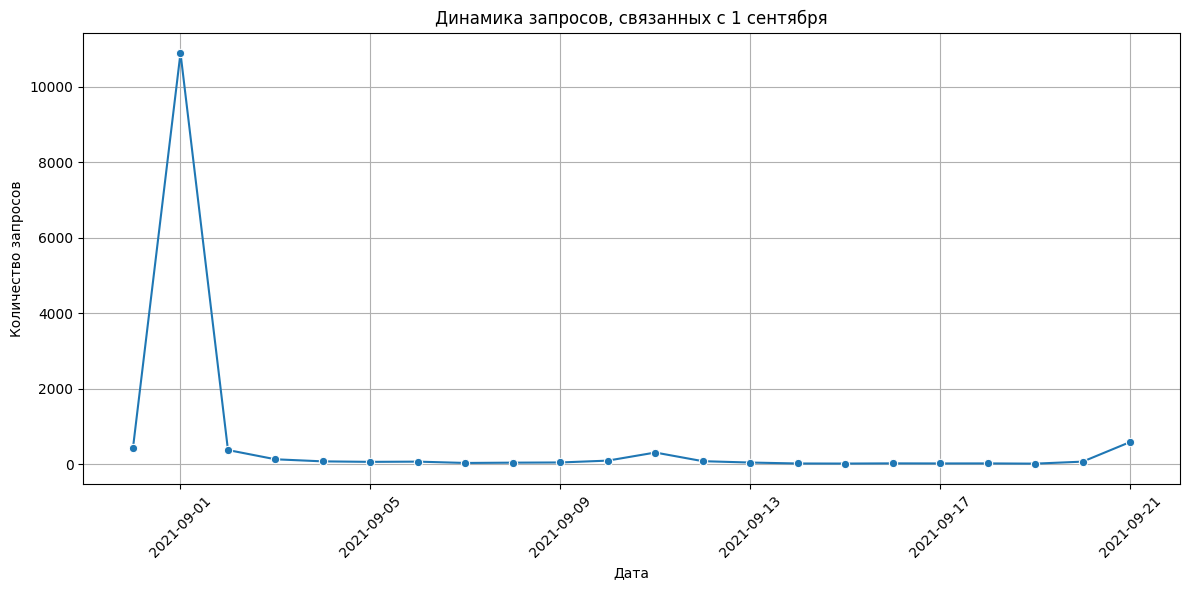

In [37]:
# Фильтрация запросов, содержащих "1 сентября" в разных вариациях
september_1_queries = df[df['query'].str.contains(
    r'1\s*сентября|первое\s*сентября|1\s*09|01\.09|первое\s*сентябр|1\s*сентябр', 
    case=False, regex=True
)]

# Группировка по дате и подсчет количества запросов
sept1_trend = september_1_queries.groupby('date').size().reset_index(name='count')

# Построение графика
plt.figure(figsize=(12, 6))
sns.lineplot(data=sept1_trend, x='date', y='count', marker='o')
plt.title('Динамика запросов, связанных с 1 сентября')
plt.xlabel('Дата')
plt.ylabel('Количество запросов')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Выводы по анализу поиска картинок в Яндексе
1. Различия в популярных запросах
✅ Смартфоны (touch):

Лидируют NSFW-запросы (порно, секс, хентай)

Много персонализированных запросов (например, "с днём рождения Лена")

✅ Компьютеры (desktop):

Чаще ищут утилитарный контент:

"календарь 2021", "таблица Менделеева", "английский алфавит"

"обои на рабочий стол", "картинки"

➡ Вывод: На смартфонах преобладают развлекательные/личные запросы, на компьютерах — рабочие и образовательные.

2. Активность по времени суток
📱 Смартфоны:

Пики утром (8:00–10:00) и вечером (18:00–22:00)

Ночью активность падает, но остаётся выше, чем на десктопе

💻 Компьютеры:

Основная активность днём (12:00–16:00) — вероятно, рабочие часы

Вечерний всплеск слабее, чем на смартфонах

➡ Вывод: Смартфоны используются "на ходу", компьютеры — в более стационарных условиях.

3. Дневная и недельная динамика
📅 По дням недели:

Рост активности с четверга по воскресенье

Спад в понедельник–среду

➡ Вывод: Люди чаще ищут развлекательный контент в конце недели.

4. Контрастные тематики
🔞 NSFW-запросы:

На смартфонах встречаются в 7 раз чаще, чем на компьютерах (хи-квадрат: p-value ≈ 0.000)

Примеры: "порно", "секс", "зверополис порно"

📚 Рабочие/учебные запросы:

На компьютерах популярнее в 2–3 раза

Примеры: "таблица Менделеева", "английский алфавит"

➡ Вывод: Платформа влияет на тип запросов — это важно для персонализации.

Рекомендации для Яндекса
1. Персонализация поиска под платформу
Для смартфонов:

Усилить фильтрацию NSFW-контента (если это нежелательно)

Предлагать шаблоны для персональных запросов ("с днём рождения [имя]")

Для компьютеров:

Продвигать образовательный и рабочий контент ("таблицы", "календари")

Оптимизировать поиск под широкоформатные экраны

2. Оптимизация выдачи в зависимости от времени
Утро (8:00–10:00): Быстрые ответы (мемы, картинки для соцсетей)

День (12:00–16:00): Рабочие/учебные материалы (графики, схемы)

Вечер (18:00–22:00): Развлекательный контент (гифки, арты)

3. Улучшение фильтров
Добавить платформо-зависимые настройки безопасного поиска

Для десктопов: выделить категории "Рабочие материалы", "Обои"

4. A/B-тестирование
Протестировать разную выдачу для одних и тех же запросов на разных устройствах

Пример: для "календарь 2021" на смартфоне показывать мобильные виджеты, на ПК — печатные версии

Итог
Пользователи ищут картинки по-разному в зависимости от устройства и времени.
Главный инсайт: Смартфоны ассоциируются с личными/развлекательными запросами, компьютеры — с рабочими.

🚀 Что внедрить в первую очередь:

Персонализация выдачи под платформу

Усиление фильтров NSFW-контента на мобильных устройствах

Оптимизация рабочих/учебных запросов для десктопов